# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(query_url + city).json()
        # Parse the JSON and retrieve data
        city_weather = response['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | san jose
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | tarudant
City not found. Skipping...
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | san cristobal
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | burnie
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | bandar
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | jinxiang
Processing Record 19 of Set 1 | zhanaozen
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | asau
Processing Record 22 of Set 1 | butaritari
Processing Record

In [18]:
response['dt']

1673926316

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,23.85,87,100,3.60,US,1673929984
1,albany,42.6001,-73.9662,-1.31,70,8,2.30,US,1673929168
2,isangel,-19.5500,169.2667,26.91,64,97,5.10,VU,1673929985
3,rikitea,-23.1203,-134.9692,25.32,70,4,3.36,PF,1673929986
4,san jose,37.3394,-121.8950,10.72,82,75,2.57,US,1673929384


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,23.85,87,100,3.60,US,1673929984
1,albany,42.6001,-73.9662,-1.31,70,8,2.30,US,1673929168
2,isangel,-19.5500,169.2667,26.91,64,97,5.10,VU,1673929985
3,rikitea,-23.1203,-134.9692,25.32,70,4,3.36,PF,1673929986
4,san jose,37.3394,-121.8950,10.72,82,75,2.57,US,1673929384


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

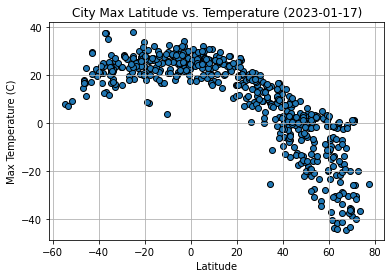

In [48]:
# Build scatter plot for latitude vs. temperature

#Getting date information

timestamp = city_data_df["Date"][0]
dt_object = datetime.fromtimestamp(timestamp)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({dt_object.date()})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

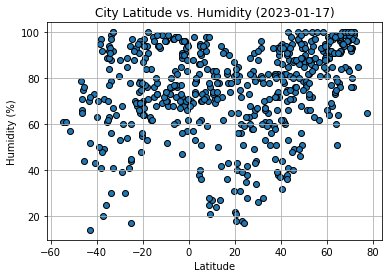

In [51]:
#Getting date information

timestamp = city_data_df["Date"][0]
dt_object = datetime.fromtimestamp(timestamp)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({dt_object.date()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

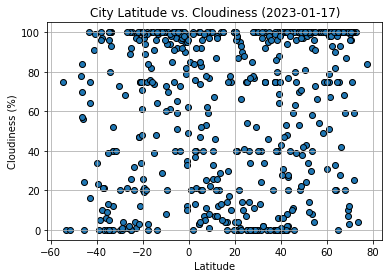

In [53]:
#Getting date information

timestamp = city_data_df["Date"][0]
dt_object = datetime.fromtimestamp(timestamp)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({dt_object.date()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

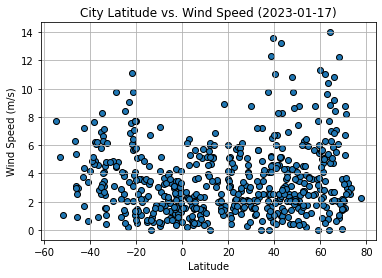

In [55]:
#Getting date information

timestamp = city_data_df["Date"][0]
dt_object = datetime.fromtimestamp(timestamp)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({dt_object.date()})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def linear_regresion (x_values,y_values, xlabel, ylabel):

    # Perform a linear regression on temperature vs. latitude
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    # 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Label plot and annotate the line equation
    # 
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.annotate(line_eq,(x_values.mean(),y_values.max()-0.2*y_values.mean()),fontsize=15,color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")


In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,23.85,87,100,3.60,US,1673929984
1,albany,42.6001,-73.9662,-1.31,70,8,2.30,US,1673929168
4,san jose,37.3394,-121.8950,10.72,82,75,2.57,US,1673929384
8,san cristobal,7.7669,-72.2250,19.10,95,53,1.03,VE,1673929742
9,kapaa,22.0752,-159.3190,26.18,81,20,1.54,US,1673929992


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isangel,-19.5500,169.2667,26.91,64,97,5.10,VU,1673929985
3,rikitea,-23.1203,-134.9692,25.32,70,4,3.36,PF,1673929986
5,kaitangata,-46.2817,169.8464,17.83,66,70,5.40,NZ,1673929988
6,mar del plata,-38.0023,-57.5575,21.02,97,100,6.26,AR,1673929733
7,hobart,-42.8794,147.3294,29.47,52,75,7.20,AU,1673929697


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7302916346197993


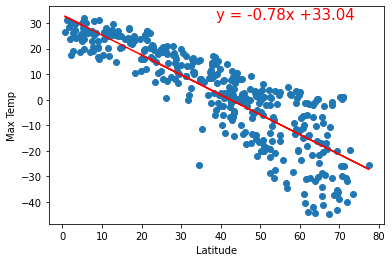

In [83]:
# Linear regression on Northern Hemisphere
linear_regresion (northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Latitude" , "Max Temp")

The r-value is: 0.11543384334841626


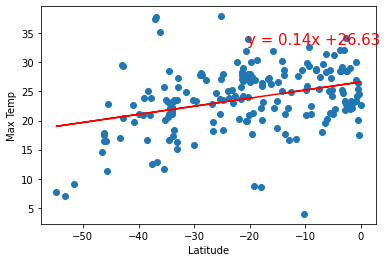

In [84]:
# Linear regression on Southern Hemisphere
linear_regresion (southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Latitude" , "Max Temp")

**Discussion about the linear relationship:** There is a strong correlation between Temperature and Latitude in the Northern Hemisphere. On the other hand, the correlation in the Southern Hemisphere is very weak. For the particular dataset under study, there are more samples in the Northern Hemisphere than in the Southern Hemisphere (371 vs. 190, respectively).

For the sample obtained, the average Latitude in the Northern Hemisphere was 38.91, whereas the average latitude in the Southern Hemisphere was -20.43. This means that a more significant part of the sample in the Southern Hemisphere was in the tropical region. (The tropics are defined in latitude by the Tropic of Cancer in the Northern Hemisphere at 23.43629° N and the Tropic of Capricorn in the Southern Hemisphere at 23.43629° S)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16327497478004085


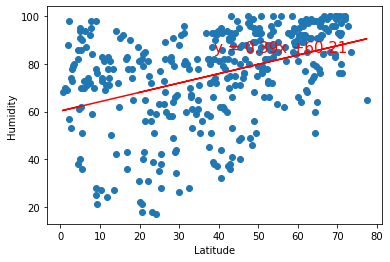

In [85]:
# Northern Hemisphere
linear_regresion (northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Latitude" , "Humidity")

The r-value is: 0.08152682042894913


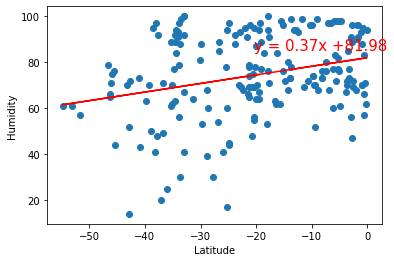

In [87]:
# Southern Hemisphere
linear_regresion (southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Latitude" , "Humidity")

**Discussion about the linear relationship:** There is none to very weak correlation between the Humidity and Latitude in both the Northern and Southern Hemispheres (Both values are under 0.3)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09694943787266845


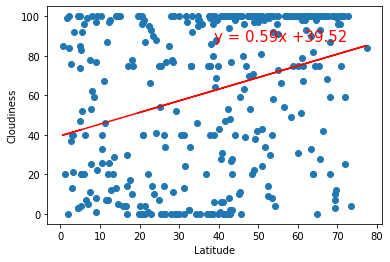

In [89]:
# Northern Hemisphere
linear_regresion (northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Latitude" , "Cloudiness")

The r-value is: 0.15138512985420405


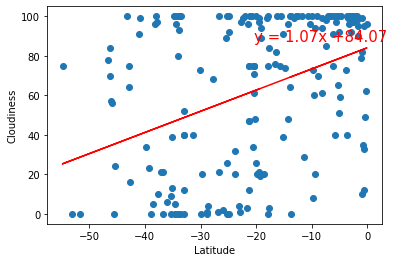

In [91]:
# Southern Hemisphere
linear_regresion (southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Latitude" , "Cloudiness")

**Discussion about the linear relationship:** There is none to very weak correlation between the Cloudiness and Latitude in both the Northern and Southern Hemispheres (Both values are under 0.3)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03879504577913238


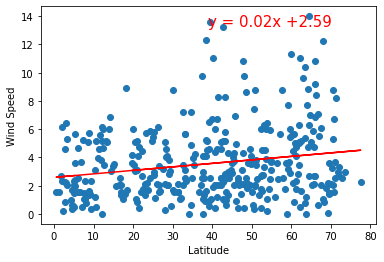

In [93]:
# Northern Hemisphere
linear_regresion (northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Latitude" , "Wind Speed")

The r-value is: 0.1182136466749865


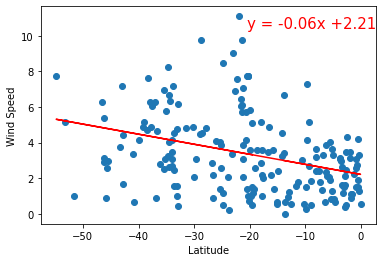

In [95]:
# Southern Hemisphere
linear_regresion (southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Latitude" , "Wind Speed")

**Discussion about the linear relationship:** There is none to very weak correlation for the Wind Speed and Latitude in both the Northern and Southern Hemispheres (Both values are under 0.3)